# This notebook was used to create the plots


In [ ]:
import numpy as np
import laserhockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time
import torch
import DDPG
import TD3
import os
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import pickle

In [96]:
def moving_average(data, win_size):
    data = np.asarray(data)
    averages = []
    for i in range(len(data)-win_size):
        averages.append(np.sum(data[i:i+win_size])/win_size)
    return averages

def fixed_moving_average(data, win_size):
    data = np.asarray(data)
    averages = []
    for i in range(len(data)):
        averages.append(np.sum(data[i-min(i,win_size):i])/min(i,win_size))
    return averages

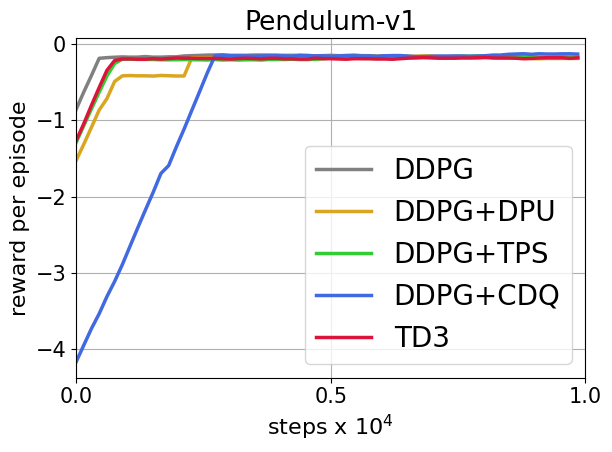

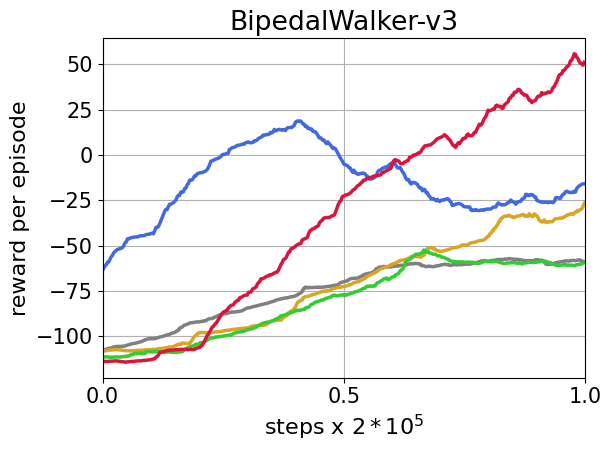

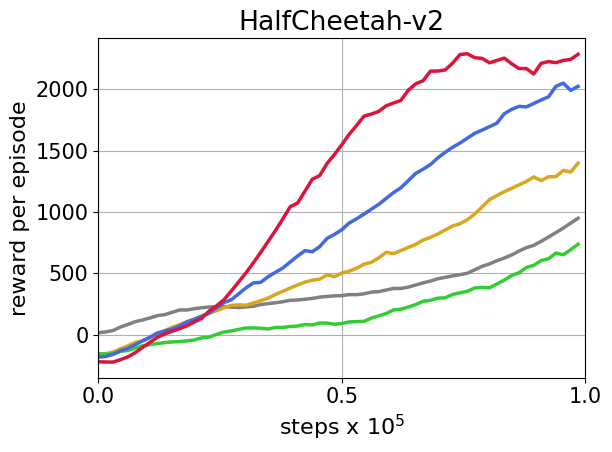

In [109]:
font = {'size'   : 16}

matplotlib.rc('font', **font)
envs = ["pendulum", "walker", "cheetah"]
envs_labels = ["Pendulum-v1", "BipedalWalker-v3", "HalfCheetah-v2"]
for ee, env in enumerate(envs):
    mode = "normal"
    name = "agentcompare"
    if env == "pendulum":
        name = "pendulum new"
    if env == "walker":
        name = "actionfixagentcompare2"
    rewards = []
    losses = []
    #agents = ["TD3"]
    agents = ["DDPG", "DPU", "TPS", "CDQ", "TD3"]
    labels = ["DDPG", "DDPG+DPU", "DDPG+TPS", "DDPG+CDQ", "TD3"]
    colors = ["gray", "goldenrod", "limegreen", "royalblue", "crimson"]
    for agent_type in agents:
        filename = f'./results/{agent_type}_{env}_{name}_{mode}_train_stats.pkl'
        with (open(filename, "rb")) as openfile:
            loaded_stats = pickle.load(openfile)
            #print(loaded_stats["Experiment setup"])
            #print(loaded_stats["Rewards"])
            reward = loaded_stats["Rewards"]
            avg = round(len(reward)/3)
            #print(avg)
            rewards.append(moving_average(reward,avg))
    
    
    fig, ax = plt.subplots()
    fig.figsize=((5,5))
    min = 1e10
    max = -1e10
    max_len = 0
    rewards_resized = []
    for ii, r in enumerate(rewards):
        r = np.asarray(r)
        if np.min(r)<min:
            min = np.min(r)
        if np.max(r)>max:
            max = np.max(r)
        if r.shape[0]>max_len:
            max_len = r.shape[0]
    x = np.arange(max_len)
    for ii, r in enumerate(rewards):
        x = np.arange(len(r))*(max_len/len(r))
        x = x/max_len
        ax.plot(x, r, label=labels[ii], lw=2.5, c=colors[ii])
    xticks = [0, 0.5,1]
    ax.grid()
    ax.set_xticks(xticks)
    ax.set_xlim(0, 1)
    ax.set_title(envs_labels[ee])
    scale = "10^5"
    if env == "pendulum":
        scale = "10^4"
    elif env =="walker":
        scale = "2*10^5"
    ax.set_xlabel(f"steps x ${scale}$")
    ax.set_ylabel("reward per episode")
        
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    if ee==0:
        plt.legend(prop={'size' : 20})
    if not os.path.exists("figures"):
        os.makedirs("figures")
    plt.tight_layout()
    plt.savefig(f"figures/{env}", dpi='figure')

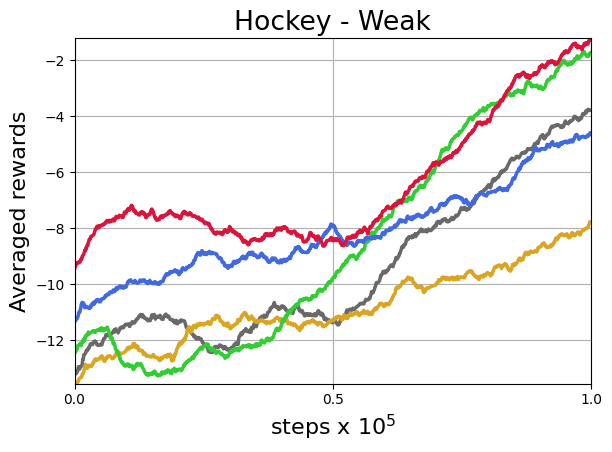

In [122]:
font = {'size'   : 16}

matplotlib.rc('font', **font)
modes = ["weak"]
env = "hockey"
envs_labels = ["Hockey - Weak", "Hockey - Strong"]
for ee, mode in enumerate(modes):
    #mode = "normal"
    name = "fixedactionscompare"
    if mode == "normal":
        name = "agentcomparefinal"
    rewards = []
    losses = []
    agents = ["TD3"]
    agents = ["DDPG", "DPU", "TPS", "CDQ", "TD3"]
    #agents = ["DDPG", "TD3"]
    labels = ["DDPG", "DDPG+DPU", "DDPG+TPS", "DDPG+CDQ", "TD3", "TD3_PRIO"]
    colors = ["dimgrey", "goldenrod", "limegreen", "royalblue", "crimson", "pink"]
    for agent_type in agents:
        name = "fixedactionscompare"
        #if agent_type == "TD3":
        #    name = "agentcomparefinal"#"agentcomparefinal"
        filename = f'./results/{agent_type}_{env}_{name}_{mode}_train_stats.pkl'
        with (open(filename, "rb")) as openfile:
            loaded_stats = pickle.load(openfile)
            #print(loaded_stats["Experiment setup"])
            #print(loaded_stats["Rewards"])
            reward = loaded_stats["Rewards"]
            #reward = reward[:round(len(reward)/2)]
            #print(len(rewards))
            avg = round(len(reward)/4)
            #print(avg)
            rewards.append(moving_average(reward,avg))
            #losses.append(moving_average(loaded_stats["losses"][0][loaded_stats["losses"][0]!= np.array(None)],150))
    #print(rewards)
    fig, ax = plt.subplots()
    fig.figsize=((5,5))
    min = 1e10
    max = -1e10
    max_len = 0
    rewards_resized = []
    for ii, r in enumerate(rewards):
        r = np.asarray(r)
        if np.min(r)<min:
            min = np.min(r)
        if np.max(r)>max:
            max = np.max(r)
        if r.shape[0]>max_len:
            max_len = r.shape[0]
    x = np.arange(max_len)
    for ii, r in enumerate(rewards):
        x = np.arange(len(r))*(max_len/len(r))
        x = x/max_len
        ax.plot(x, r, label=labels[ii], lw=2.5, c=colors[ii])
    xticks = [0, 0.5,1]
    ax.grid()
    ax.set_xticks(xticks)
    ax.set_xlim(0, 1)
    ax.set_ylim(min, max)
    ax.set_title(envs_labels[ee])
    ax.set_xlabel("steps x $10^5$")
    ax.set_ylabel("Averaged rewards")
        
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    #if ee==0:
    #    plt.legend(prop={'size' : 20})
    if not os.path.exists("figures"):
        os.makedirs("figures")
    plt.tight_layout()
    plt.savefig(f"figures/{env}_{mode}", dpi='figure')

{'name': 'ou2', 'agent_type': 'TD3', 'env_type': 'hockey', 'test': False, 'render': False, 'episodes': 1000, 'max_steps': 200000, 'mode': 'weak', 'eps': 0.1, 'discount': 0.99, 'update_target_every': 100, 'update_policy_every': 2, 'hidden_sizes_actor': [256, 256], 'hidden_sizes_critic': [256, 256], 'iter_fit': 1, 'batch_size': 256, 'smoothing_std': 0.0001, 'smoothing_clip': 0.0002, 'checkpoint1': None, 'checkpoint2': None, 'learning_rate_critic': 0.001, 'learning_rate_actor': 0.001, 'buffer_size': 1000000, 'theta': 0.005, 'prio_replay': False, 'exp_phase': 2000, 'cdq': True, 'ou': True}
1473
{'name': 'fixedactionscompare', 'agent_type': 'TD3', 'env_type': 'hockey', 'test': False, 'render': False, 'episodes': 400, 'max_steps': 200000, 'mode': 'weak', 'eps': 0.1, 'discount': 0.99, 'update_target_every': 100, 'update_policy_every': 2, 'hidden_sizes_actor': [256, 256], 'hidden_sizes_critic': [256, 256], 'iter_fit': 1, 'batch_size': 256, 'smoothing_std': 0.0001, 'smoothing_clip': 0.0002, 'ch

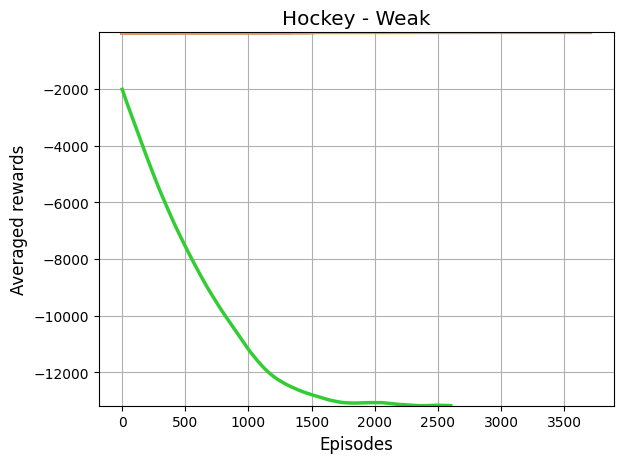

In [124]:
font = {'size'   : 12}

matplotlib.rc('font', **font)
modes = ["weak"]
env = "hockey"
envs_labels = ["Hockey - Weak", "Hockey - Strong"]
names = ["ou2", "fixedactionscompare", "fixedactionscompare_more", "priofinal2", "tournament", "priofinal2_noou", "Nnoise_lowlr_prio"]
#names = [, "priofinal"]
for ee, mode in enumerate(modes):
    #mode = "normal"
    name = "ou"
    if mode == "normal":
        name = "agentcomparefinal"
    rewards = []
    losses = []
    agents = ["TD3"]
    #agents = ["DDPG", "DPU", "TPS", "CDQ", "TD3"]
    #agents = ["DDPG", "TD3"]
    labels = ["DDPG", "DDPG+DPU", "DDPG+TPS", "DDPG+CDQ", "TD3"]
    colors = ["dimgrey", "goldenrod", "limegreen", "royalblue", "crimson", "pink", "orange"]
    for name in names:
        filename = f'./results/{agent_type}_{env}_{name}_{mode}_train_stats.pkl'
        with (open(filename, "rb")) as openfile:
            loaded_stats = pickle.load(openfile)
            print(loaded_stats["Experiment setup"])
            #print(loaded_stats["Rewards"])
            reward = loaded_stats["Rewards"]
            #if name != "ou" or name != "prio_final":
            print(len(reward))
            if name == "ou22":
                reward = reward[:round(len(reward)/2)]
            avg = round(len(reward)/10)
            #print(avg)
            rewards.append(moving_average(reward,avg))
            #losses.append(moving_average(loaded_stats["losses"][0][loaded_stats["losses"][0]!= np.array(None)],150))
    #print(rewards)
    fig, ax = plt.subplots()
    fig.figsize=((5,5))
    min = 1e10
    max = -1e10
    max_len = 0
    rewards_resized = []
    for ii, r in enumerate(rewards):
        r = np.asarray(r)
        if np.min(r)<min:
            min = np.min(r)
        if np.max(r)>max:
            max = np.max(r)
        if r.shape[0]>max_len:
            max_len = r.shape[0]
    x = np.arange(max_len)
    for ii, r in enumerate(rewards):
        x = np.arange(len(r))*(max_len/len(r))
        x = x/max_len
        #ax.plot(x, r, label=names[ii], lw=2.5, c=colors[ii])
        ax.plot(r, label=names[ii], lw=2.5, c=colors[ii])
    #xticks = [0, 0.5,1]
    ax.grid()
    #ax.set_xticks(xticks)
    #ax.set_xlim(0, 1)
    ax.set_ylim(min, max)
    ax.set_title(envs_labels[ee])
    ax.set_xlabel("Episodes")
    ax.set_ylabel("Averaged rewards")
        
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    #if ee==0:
    #    plt.legend(prop={'size' : 20})
    if not os.path.exists("figures"):
        os.makedirs("figures")
    plt.tight_layout()
    plt.savefig(f"figures/{env}_{mode}", dpi='figure')